<div class="alert alert-block alert-success">
    

# 🤖 Support Vector Machines
    
 👨‍🏫 **Vikesh K**      
 📓 **Lab-09**
  

</div>

 💡  <span style='font-family:Georgia'>
    <font color= darkred> **"Work hard in silence. Let success make the noise"**
    </font> 💡   

<div class="alert alert-block alert-success">

# 📝Lab Agenda
    
We will cover:
    
* Fitting SVM model to numerical data with its variants
* Visualizing the decision boundaries of SVM
* Comparing the SVM results against other Classifiers


    
</div>

<div class="alert alert-block alert-danger">


## Support Vector Machines Overview

***Technique :  Classifies by finding a separator***

    
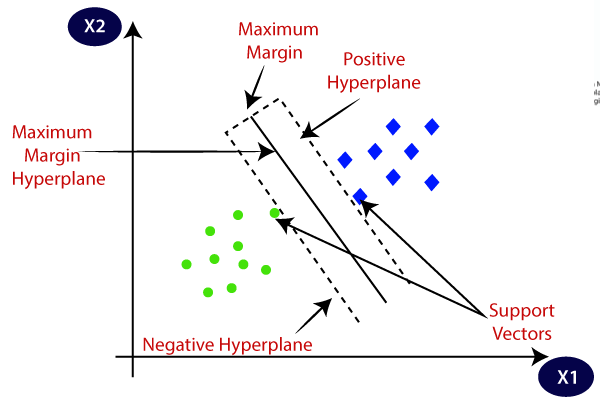
    
    
### Algo Steps

* Mapping data to a feature space
    * for example a data with two data columns gets mapped to a 2-d chart, forming a line
    * Here lies one challenge, we need to map the data in the manner to highlight the differences between the values 
    * This process is called `kernelling` and mathemtical function is `kernel`

* Find a separator between the points that maximises the margin
    * It will be a straight line in two dimensional space and a hyperplane in higher dimensions
    * The separator placement is determined by the values closer to the margin, hence called `support vectors`

### Advantages

* Accurate in high-dimensional spaces
* Memory efficient; as it doesn't rely on the complete data and relies only on support vectors

### Disadvantages
* Prone for over-fitting if features is much greater than samples
* No probability estimation

### Usages

* Good for Image recognition
* Effective in text mining; especially due to efficiency in high-dimensional data 
* Good for Gene Classification
* Other classification tasks
    
 </div>

<div class="alert alert-block alert-success">

# 📓 Case Study : Wine Data

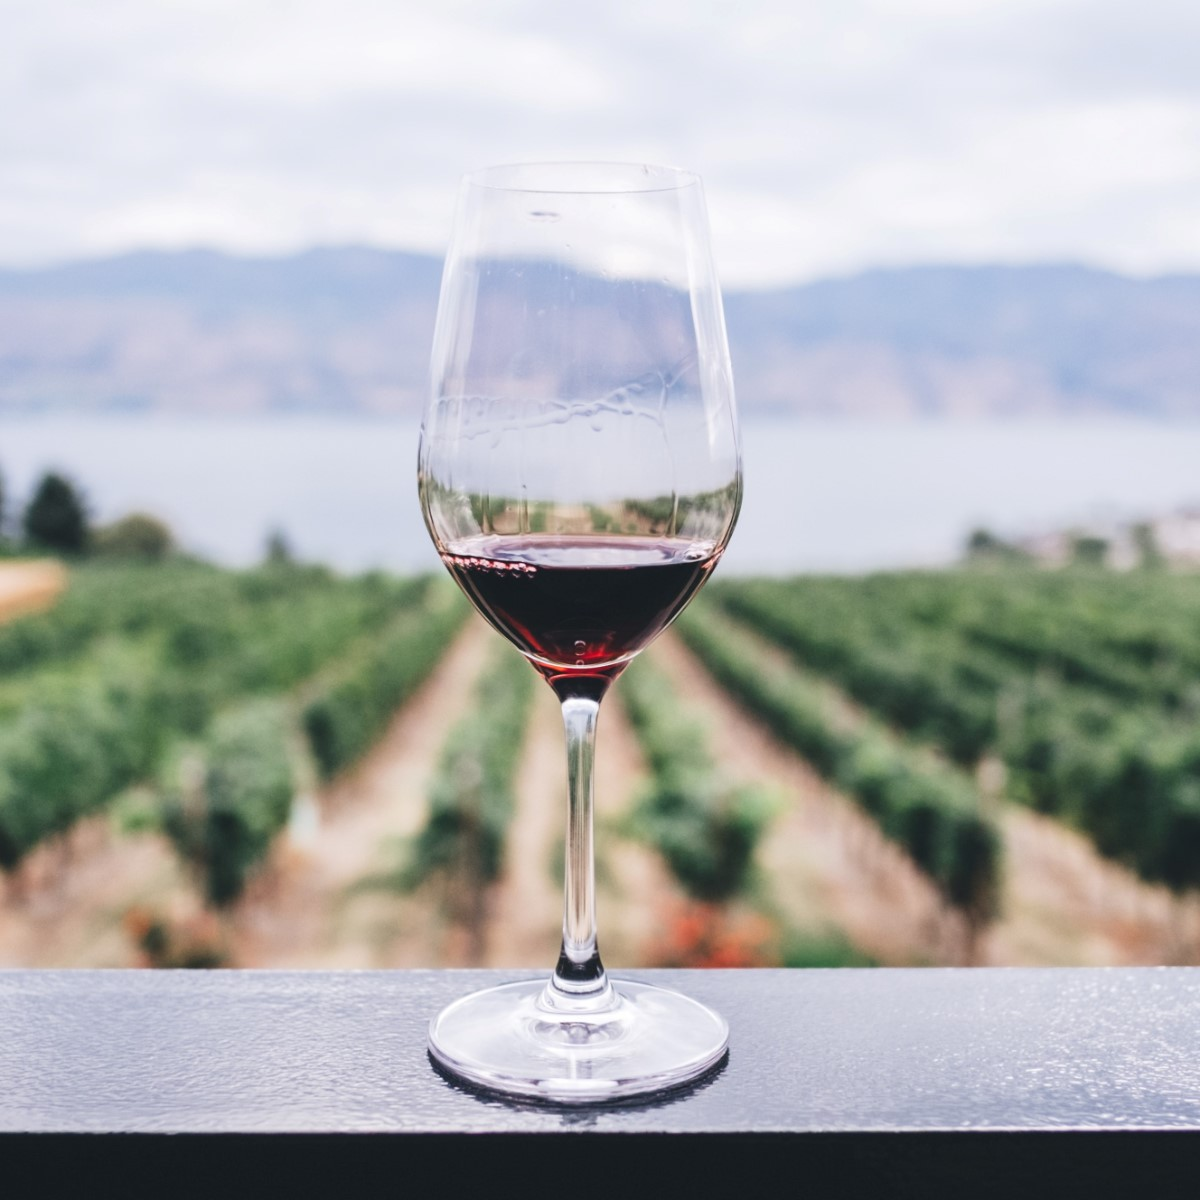

    
</div>

```{note}
**In Python, whenever you want to run/launch a package, you need to `import` it.** 

In the smart phone analogy, this is equal to tapping on an app to start it. You would have pre-installed apps and apps that you need to install. 
Remember, like in a phone's pre-installed apps, `os` is one of the pre-installed apps.**

**You won't get any message if a package is imported successfully. Only if you do a wrong loading, error message will be shown**

    
**We are dealing with wine dataset. It deals with different categories of the wine. https://archive.ics.uci.edu/ml/datasets/wine**


Data Set Information:

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are : 
 * Alcohol  
 * Malic acid   
 * Ash   
 * Alcalinity of ash   
 * Magnesium   
 * Total phenols   
 * Flavanoids    
 * Nonflavanoid phenols   
 * Proanthocyanins   
 * Color intensity   
 * Hue   
 * Proline   
```

## Data load and inspect

In [1]:
## libraries
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# plt.rcdefaults() # to get the default plot 


# ml models
from sklearn.svm import SVC #Support vector classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# for ignoring warnings
import warnings
warnings.simplefilter("ignore")

print("All modules loaded properly")

All modules loaded properly


In [2]:
# loading the datasets
df = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/wine.csv")

In [3]:
df.shape

(178, 14)

**Inspect the data**

In [4]:
# how to get the shape of the data 
print(df.shape)

# How to get the column data types
print(df.info())

# how to check for few initial rows
display(df.head(5))

(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     0    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     0    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     0    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     0    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     0    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735

**Understanding the Target Variable**

We are trying to predict the type of wine based on chemical properties

In [5]:
df['Wine'].value_counts()

Wine
1    71
0    59
2    48
Name: count, dtype: int64

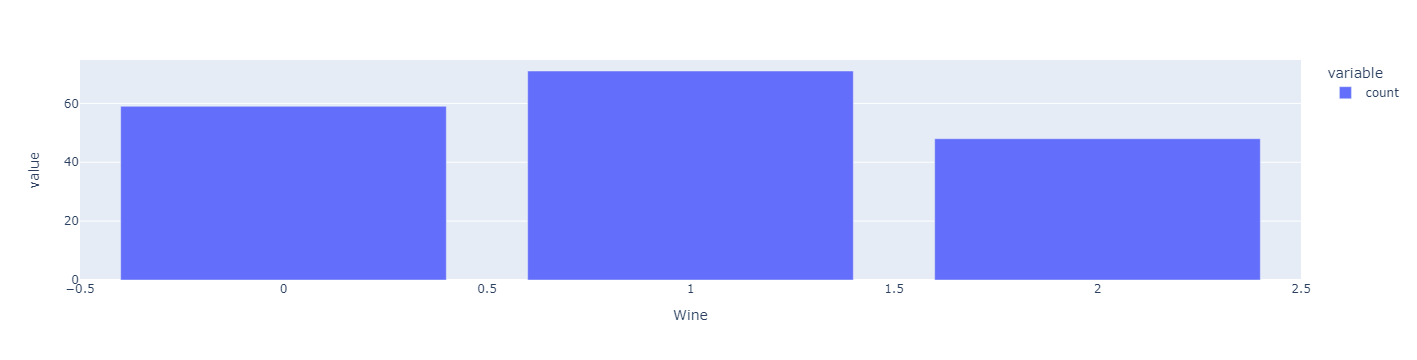

In [6]:
df['Wine'].value_counts().plot(kind = 'bar', backend = 'plotly')

```{note}
    
**We will focus on subset of column for prediction to make it easy to visualize the results later**
    
```

**Select only three columns - "Wine", "Alchol" and "Malic Acid"**

In [7]:
# Select only the three columns required for our analysis

# Wine, Alcohol, Malic.acid
selection = ["Wine", "Alcohol", "Malic.acid"]

df = df[selection]
df.head()

Wine  Alcohol  Malic.acid
0     0    14.23        1.71
1     0    13.20        1.78
2     0    13.16        2.36
3     0    14.37        1.95
4     0    13.24        2.59

## Data Viz

**Plot the appropriate chart**

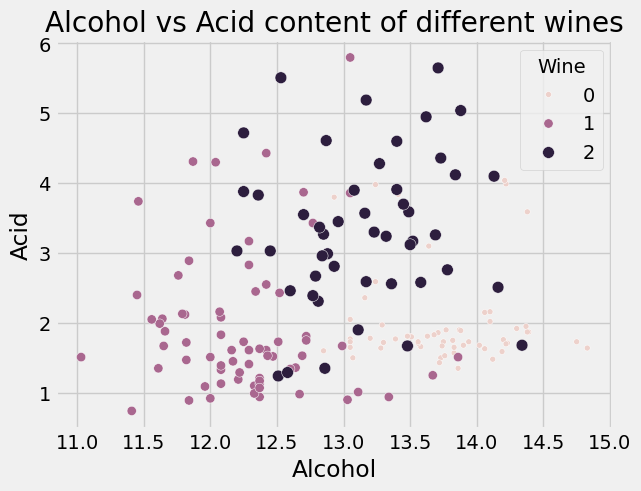

In [8]:
# name the axis, titles
plt.xlabel("Alcohol")
plt.ylabel("Acid")
plt.title("Alcohol vs Acid content of different wines")

#sns.color_palette("dark")

# plot the chart between Alchohol and Malic Alic acid, with color given by Wine
sns.scatterplot(x = "Alcohol", y = "Malic.acid", data = df, s=20, hue = "Wine", size = 'Wine');

# to check the colors in the pallette

# Our chart is using only the initial three colors

## Data Modeling 

```{note}
    
### Function to generate classification plots
❗❗ **You don't need to understand it at this stage. This is used to generate plots at the end**.❗❗
    
```

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# Source: Mike Gelbart

def make_meshgrid(x, y, h=.02, lims=None):
    
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, transformation=None, **params):
    """Plot the decision boundaries for a classifier.
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """

    X = np.c_[xx.ravel(), yy.ravel()]
    if transformation is not None:
        X = transformation(X)
        # xx = np.reshape(X[:,0], xx.shape)
        # yy = np.reshape(X[:,1], yy.shape)


    if proba:
        if hasattr(clf, 'predict_proba'):
            Z = clf.predict_proba(X)[:,-1]
            Z = Z.reshape(xx.shape)
            out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
            ax.contour(xx, yy, Z, levels=[0.5])
        else:
            Z = clf.decision_function(X)
            Z = Z.reshape(xx.shape)
            out = ax.contourf(xx, yy, Z, **params)
    else:
        Z = clf.predict(X)
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X.iloc[:,0], X.iloc[:,1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)
    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#     ax.set_xlabel(data.feature_names[0])
#     ax.set_ylabel(data.feature_names[1])
    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
#     ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax
    
print("Code successfully ran")

Code successfully ran


### Create the Feature and Target Variable

In [10]:
# Create two data-frames. 
# X with only the features
# y with only the target values

# Drop wine column for X and retain only Wine for y
x = df.drop(columns = "Wine")
y = df["Wine"]

# check the shape of data
print(x.shape)
print(y.shape)

# check the type of data
print(type(x))
print(type(y))

(178, 2)
(178,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Standard Scaling 

Since the SVM classifier uses distances metrics, we would need to standardize the data before using the classifier

Read: **[Why Feature Scaling in SVM?](https://www.baeldung.com/cs/svm-feature-scaling)**

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# intiate 
scaler = StandardScaler()

# fit and transform 
x_scaled = scaler.fit_transform(x)

**Converting the numpy array into pandas df for ease of use**

In [13]:
x_scaled = pd.DataFrame(x_scaled, columns = x.columns)

**Visually inspect the impact of Scaling**

**Density plot of UNscaled data**

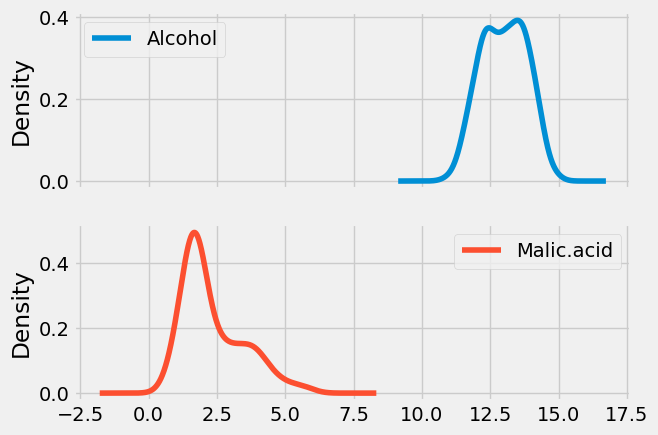

In [14]:
x.plot(kind = 'kde', subplots = True);

**Density plot of Scaled data**

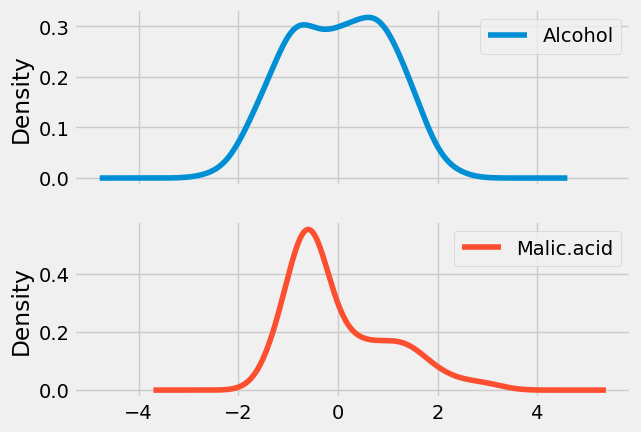

In [15]:
x_scaled.plot(kind = 'kde', subplots = True);

### Building a SVM Classifier

[Read more about SVC here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

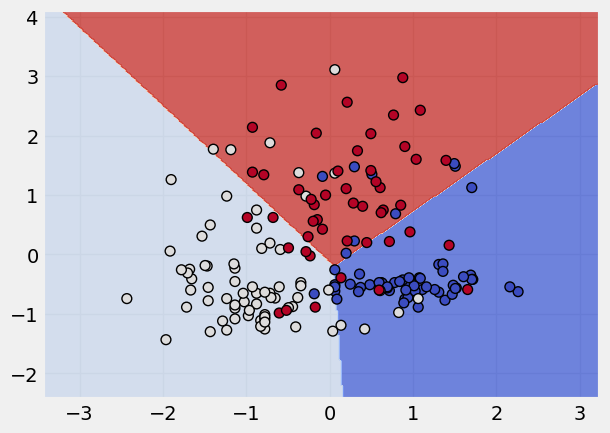

In [16]:
# call the model 
svm = SVC(kernel = "linear")

# fit the model 
svm.fit(x_scaled,y)

# plot the classification done by model 
plot_classifier(x_scaled, y, svm) # the lims stand for axis limits

### Highlighting the use of support vectors

Number of original examples: 178
Number of support vectors: 82


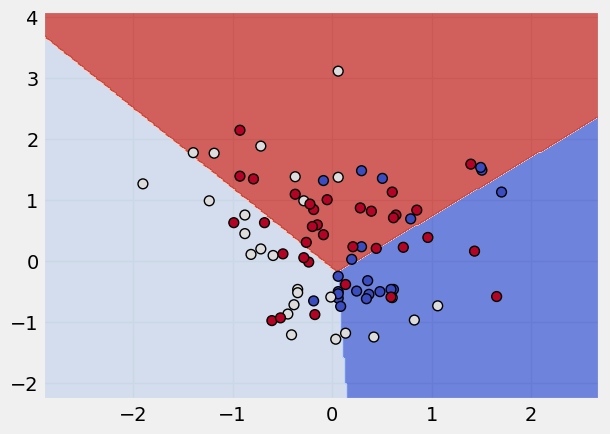

In [17]:
# get the dimensions of the data 
print("Number of original examples:", len(x))
print("Number of support vectors:", len(svm.support_))

# Extract only the support vectors from data 
x_small = x_scaled.iloc[svm.support_]
y_small = y.iloc[svm.support_]

# # Train a new SVM using only the support vectors
svm_small = SVC(kernel = "linear")
svm_small.fit(x_small, y_small)
plot_classifier(x_small, y_small, svm_small)


```{note}

### Changing the Kernels 
    
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. 
    
```

The kernel applied is: linear


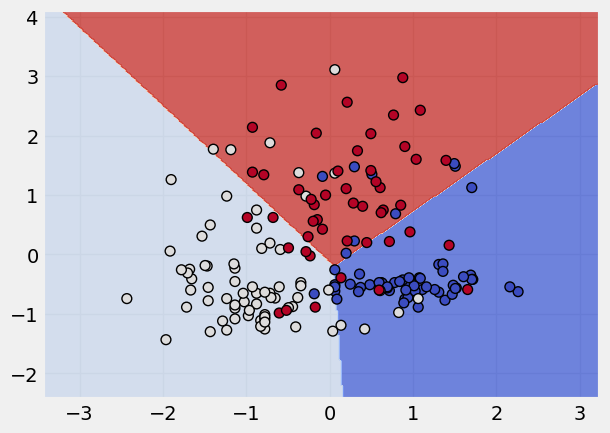

The kernel applied is: poly


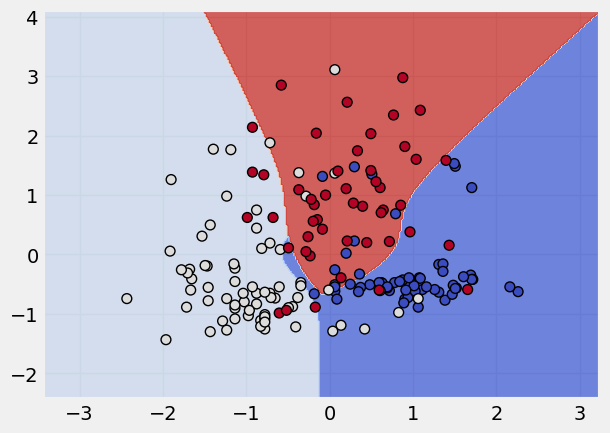

The kernel applied is: rbf


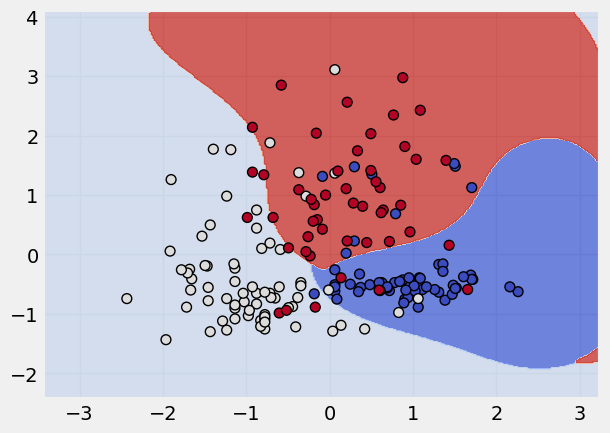

The kernel applied is: sigmoid


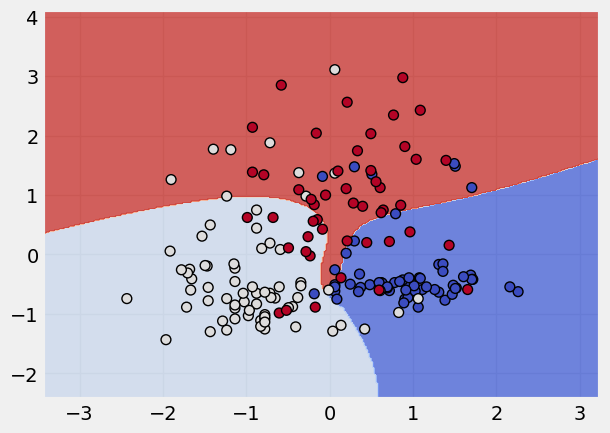

In [18]:
# making a list of the different kernel functions 
kernel_states = ["linear", "poly", "rbf", "sigmoid"]

# applying a loop to apply these kernel states
for k in kernel_states:
    print("The kernel applied is:", k)
    svm = SVC(kernel = k)
    svm.fit(x_scaled,y)
    plot_classifier(x_scaled, y, svm)

## Comparison of SVM with other Classification Models

### Decision Tree Classifier

[Read more about Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

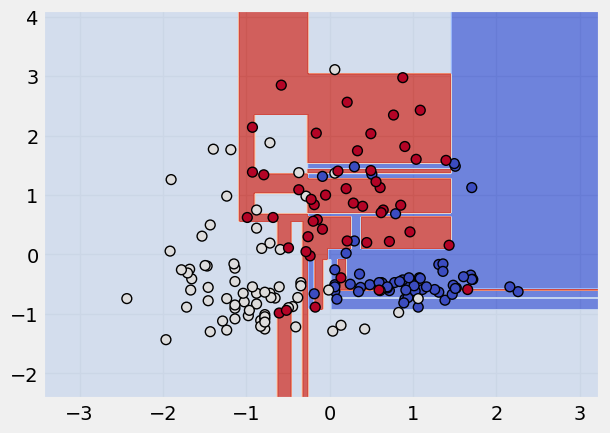

In [19]:
# call the model 
dt = DecisionTreeClassifier()

# fit the model 
dt.fit(x_scaled,y)

# plot the classification
plot_classifier(x_scaled, y, dt)

### Random Forest Classifier
[Read more about Random Forest here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

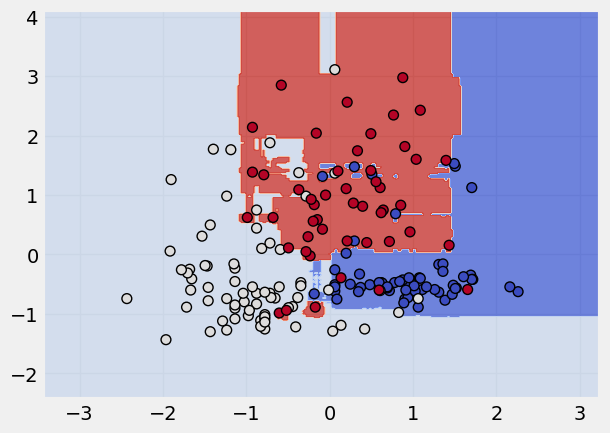

In [20]:
rf = RandomForestClassifier()
rf.fit(x_scaled,y)
plot_classifier(x_scaled, y, rf)

### Logistic Regression Classifier 
[Read more about Logistic Classifer here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

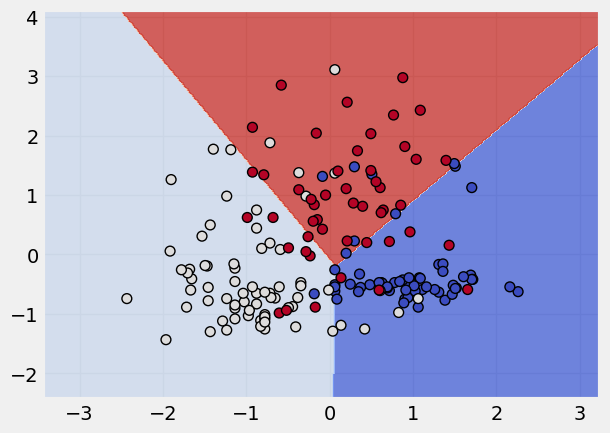

In [21]:
# calling the object
lg = LogisticRegression()

# fitting the model 
lg.fit(x_scaled,y)

# data viz the classification
plot_classifier(x_scaled, y, lg)

# 📚 Reference material 

**Kernels**
* [What are kernels in machine learning and SVM and why do we need them?](https://www.quora.com/What-are-kernels-in-machine-learning-and-SVM-and-why-do-we-need-them/answer/Lili-Jiang?srid=oOgT)

* [Kernel Function](https://towardsdatascience.com/kernel-function-6f1d2be6091)
 
* [Kernel function in scikit learn](https://www.geeksforgeeks.org/major-kernel-functions-in-support-vector-machine-svm/)

**Data Viz**
* [Matplotlib colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)
* [Matplotlib color maps](https://matplotlib.org/tutorials/colors/colormaps.html)
* [Seaborn color pallette](https://seaborn.pydata.org/tutorial/color_palettes.html)

**Analysis**
* [SVM on Wine analysis](https://blog.uiam.sk/the-wine-dataset-is-divided-by-support-vector-machines/)
    
[**Python Data Science handbook**](https://jakevdp.github.io/PythonDataScienceHandbook/) - very useful book if you want to learn how to do data science using python. Covers data manipulation, data visualisation and machine learning. Freely available 

    